<a href="https://colab.research.google.com/github/irham235/Belajar-machine-learning/blob/main/memproses_dataset_gambar_dari_dunia_nyata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2023-12-31 13:25:49--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-12-31 13:25:49--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   116MB/s    in 

In [3]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Bishop', 'Pawn', 'Knight', 'Queen', 'Rook', 'King']

In [5]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total pawn images : 76
total pawn images : 106


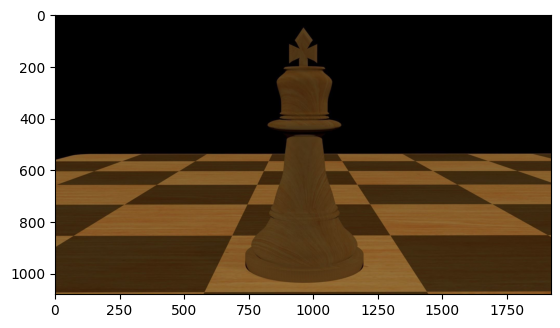

In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode = 'nearest',
                                   validation_split=0.1) # set validation split

Dataset yang kita miliki hanya terdiri dari 1 buah direktori dan tidak terbagi menjadi direktori training dan testing. Tapi tenang, dengan ImageDataGenerator kita tidak perlu susah payah membagi direktori secara manual, cukup dengan menggunakan parameter validation_split yang disebut pada paragraf sebelumnya. Dengan parameter tersebut, kita hanya cukup memberi tahu ImageDataGenerator mana data untuk training dan mana data untuk testing dengan menambahkan parameter subset dengan nilai training atau validation.

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
) # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


Selanjutnya, kita buat arsitektur dari model kita. Untuk model ini kita menggunakan 3 lapis convolution dan 2 hidden layer dengan 512 dan 256 buah unit perseptron.

In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

Setelah arsitektur dibuat, tentukan optimizer dan loss yang akan digunakan model

In [10]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Terakhir, panggil fungsi fit untuk melatih model kita.

In [11]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 15s - loss: 1.9183 - accuracy: 0.1723 - val_loss: 1.7901 - val_accuracy: 0.1923 - 15s/epoch - 239ms/step
Epoch 2/50
63/63 - 8s - loss: 1.7902 - accuracy: 0.1643 - val_loss: 1.7872 - val_accuracy: 0.1923 - 8s/epoch - 134ms/step
Epoch 3/50
63/63 - 18s - loss: 1.7865 - accuracy: 0.1824 - val_loss: 1.7844 - val_accuracy: 0.1923 - 18s/epoch - 292ms/step
Epoch 4/50
63/63 - 10s - loss: 1.7847 - accuracy: 0.1603 - val_loss: 1.7821 - val_accuracy: 0.1923 - 10s/epoch - 157ms/step
Epoch 5/50
63/63 - 13s - loss: 1.7808 - accuracy: 0.1804 - val_loss: 1.7807 - val_accuracy: 0.1731 - 13s/epoch - 201ms/step
Epoch 6/50
63/63 - 10s - loss: 1.7947 - accuracy: 0.1924 - val_loss: 1.7775 - val_accuracy: 0.1923 - 10s/epoch - 152ms/step
Epoch 7/50
63/63 - 10s - loss: 1.8097 - accuracy: 0.2285 - val_loss: 1.7850 - val_accuracy: 0.2308 - 10s/epoch - 166ms/step
Epoch 8/50
63/63 - 12s - loss: 1.7723 - accuracy: 0.2024 - val_loss: 1.7739 - val_accuracy: 0.1731 - 12s/epoch - 189ms/step
Epoch 9/50

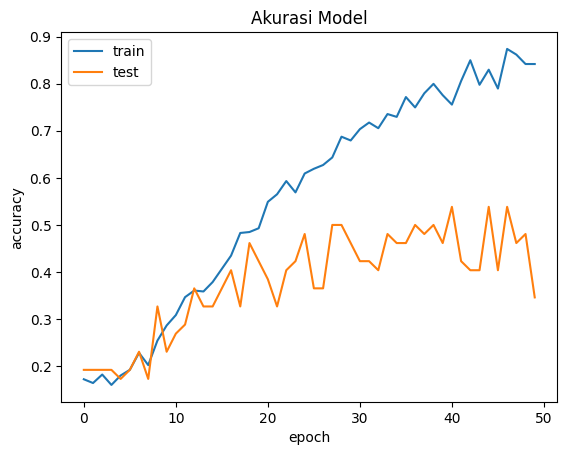

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Untuk membuat plot loss Anda cukup menjalankan kode berikut.



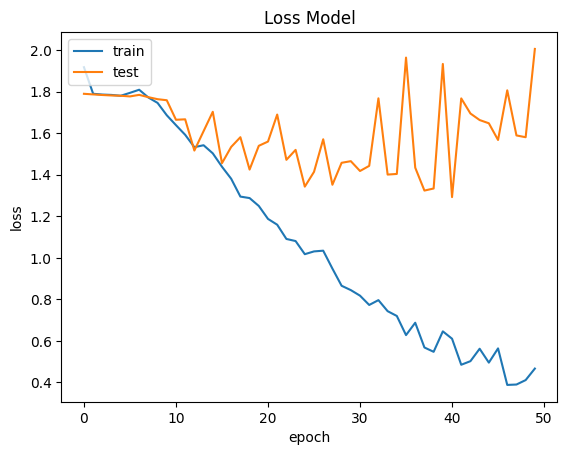

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Selamat, Anda berhasil mengembangkan model untuk mengklasifikasikan dataset yang sangat variatif. Akurasi yang didapat sekitar 50% di mana model akan membuat sekitar 50 persen prediksi yang salah.